# **ONLINE RETAIL TRANSACTION ANALYSIS**

This dataset contains information on transactions made by customers through an online retail platform. The dataset includes data on the products that were purchased, the quantity of each product, the date and time of each transaction, the price of each product, the unique identifier for each customer who made a purchase, and the country where each customer is located. This dataset can be used to analyze customer behavior and preferences, identify popular products, and optimize pricing and marketing strategies. The dataset is well-suited for data analysis and machine learning applications, as it contains a large volume of transactional data that can be used to train predictive models and make data-driven decisions.

## Objectives

* Obtain the dataset from Kaggle
* Understand customer behaviour 
* Identify popular products 
* Identify customer purchasing habits
* Analyse seasonality to identify trends 
* Optimise pricing strategies 
* Identify customer geographic location 


## Inputs

* Dataset obtained from Kaggle - https://www.kaggle.com/datasets/abhishekrp1517/online-retail-transactions-dataset

## Outputs

* Clean dataset
* Generated visualisation for insights inline with the objectives

## Additional Comments

* I would like to propose various insights and recommendations to understand the objectives and how sales can improve




---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\moby1\\Documents\\Hackathon1_project\\Hackathon1\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\moby1\\Documents\\Hackathon1_project\\Hackathon1'

# Section 1:
## loading raw dataset and cleaning

It is crucial in the online retail industry who your customers are, the purchasing habits and what can be done in order to improve sales. Identifying returning customers allows a business strategy of promotions to increase and retain business from those customers. It is also important to understand what are the most popular products as well as products are not doing so good in sales. This in turn will aid inventory management as well as identifying discarding or bringing in new lines of products based on customers purchasing history.

I will now import the libraries needed for this project below.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import plotly.express as px
from sklearn.pipeline import Pipeline

In [29]:
import pandas as pd

df = pd.read_csv("C:\\Users\\moby1\\Documents\\Hackathon1_project\\Hackathon1\\Dataset\\raw_data\\Online_Retail.csv")

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


* The dataset has already been viewed in Microsoft Excel for understanding and what needs cleaning. Identifying that duplicates exist and within the dataset, missing cells in the description column.

In [37]:
df.isnull().sum()


InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

* Above we can see that missing cells exist within the dataset under the column description
* We will check now for duplicate rows

In [39]:
df.duplicated().sum()

5268

* Above we can see that duplicate rows exist and a count of 5268 duplicates which will need removing.
* Below duplicates will be removed 

In [40]:
clean_data = df.drop_duplicates()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


* Below is an overview of the dataset displaying the size of the dataset, list of columns, if and how many missing values within the dataset.

In [ ]:
df_info = {
    "Shape": clean_data.shape, #size of dataset
    "Columns": clean_data.columns.tolist(), #list of column names
    "Missing Values": clean_data.isnull().sum().to_dict(), #identify missing values in each column
    "Sample Data": clean_data.head(8).to_dict() #sample data of 8 rows
}

df_info

{'Shape': (536641, 8),
 'Columns': ['InvoiceNo',
  'StockCode',
  'Description',
  'Quantity',
  'InvoiceDate',
  'UnitPrice',
  'CustomerID',
  'Country'],
 'Missing Values': {'InvoiceNo': 0,
  'StockCode': 0,
  'Description': 1454,
  'Quantity': 0,
  'InvoiceDate': 0,
  'UnitPrice': 0,
  'CustomerID': 0,
  'Country': 0},
 'Sample Data': {'InvoiceNo': {0: '536365',
   1: '536365',
   2: '536365',
   3: '536365',
   4: '536365',
   5: '536365',
   6: '536365',
   7: '536366'},
  'StockCode': {0: '85123A',
   1: '71053',
   2: '84406B',
   3: '84029G',
   4: '84029E',
   5: '22752',
   6: '21730',
   7: '22633'},
  'Description': {0: 'WHITE HANGING HEART T-LIGHT HOLDER',
   1: 'WHITE METAL LANTERN',
   2: 'CREAM CUPID HEARTS COAT HANGER',
   3: 'KNITTED UNION FLAG HOT WATER BOTTLE',
   4: 'RED WOOLLY HOTTIE WHITE HEART.',
   5: 'SET 7 BABUSHKA NESTING BOXES',
   6: 'GLASS STAR FROSTED T-LIGHT HOLDER',
   7: 'HAND WARMER UNION JACK'},
  'Quantity': {0: 6, 1: 6, 2: 8, 3: 6, 4: 6, 5: 2, 6:

* In the dataset within the description column, I noticed on Microsoft Excel, values which are not product descriptions but hold no unit price or have minus quantity. for example: check, ?, Manual, faulty, POSTAGE and some others. Below I will only make a copy of the raw dataset filling in the missing cells and adding a new feature.

In [ ]:
clean_data = df.copy() #copy of the data to be stored in the clean dataset

clean_data['Description'] = clean_data['Description'].fillna('Miscellaneous') #fill in missing cells

clean_data['Total_Transaction_Value'] = clean_data['Quantity'] * clean_data['UnitPrice'] #new column added


In [46]:
clean_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Transaction_Value
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


* Below we have an overview of the cleaned dataset which now shows 9 columns instead of 8, as we added in another column "Total_Transaction_Value". We can also see there are no missing cells under the column description

In [49]:
df_info = {
    "Shape": clean_data.shape, #size of dataset
    "Columns": clean_data.columns.tolist(), #list of column names
    "Missing Values": clean_data.isnull().sum().to_dict(), #identify missing values in each column
    "Sample Data": clean_data.head(8).to_dict() #sample data of 8 rows
}

df_info

{'Shape': (541909, 9),
 'Columns': ['InvoiceNo',
  'StockCode',
  'Description',
  'Quantity',
  'InvoiceDate',
  'UnitPrice',
  'CustomerID',
  'Country',
  'Total_Transaction_Value'],
 'Missing Values': {'InvoiceNo': 0,
  'StockCode': 0,
  'Description': 0,
  'Quantity': 0,
  'InvoiceDate': 0,
  'UnitPrice': 0,
  'CustomerID': 0,
  'Country': 0,
  'Total_Transaction_Value': 0},
 'Sample Data': {'InvoiceNo': {0: '536365',
   1: '536365',
   2: '536365',
   3: '536365',
   4: '536365',
   5: '536365',
   6: '536365',
   7: '536366'},
  'StockCode': {0: '85123A',
   1: '71053',
   2: '84406B',
   3: '84029G',
   4: '84029E',
   5: '22752',
   6: '21730',
   7: '22633'},
  'Description': {0: 'WHITE HANGING HEART T-LIGHT HOLDER',
   1: 'WHITE METAL LANTERN',
   2: 'CREAM CUPID HEARTS COAT HANGER',
   3: 'KNITTED UNION FLAG HOT WATER BOTTLE',
   4: 'RED WOOLLY HOTTIE WHITE HEART.',
   5: 'SET 7 BABUSHKA NESTING BOXES',
   6: 'GLASS STAR FROSTED T-LIGHT HOLDER',
   7: 'HAND WARMER UNION JAC

* Below are some descriptive statistics. This analysis shows the total sales, average transaction value, number of unique customers, popular products being sold and popular countries.

In [68]:
total_sales = clean_data['Total_Transaction_Value'].sum() #sum of sales
average_transaction_value = clean_data['Total_Transaction_Value'].mean() #average trasnaction value
no_unique_customers = clean_data['CustomerID'].nunique() #unique customers
popular_products = clean_data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(8) #popular products
popular_country = clean_data.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(5) #popular countries

#display statistic summary
stats_summary = {
    "Total Sales": total_sales,
    "Average Transaction Value": average_transaction_value,
    "Number of Unique Customers": no_unique_customers,
    "Top 8 Products" : popular_products.to_dict(),
    "Top 5 Countries" : popular_country.to_dict()

}
stats_summary


{'Total Sales': 9747747.933999998,
 'Average Transaction Value': 17.98779487699964,
 'Number of Unique Customers': 4372,
 'Top 8 Products': {'WORLD WAR 2 GLIDERS ASSTD DESIGNS': 53847,
  'JUMBO BAG RED RETROSPOT': 47363,
  'ASSORTED COLOUR BIRD ORNAMENT': 36381,
  'POPCORN HOLDER': 36334,
  'PACK OF 72 RETROSPOT CAKE CASES': 36039,
  'WHITE HANGING HEART T-LIGHT HOLDER': 35317,
  'RABBIT NIGHT LIGHT': 30680,
  'MINI PAINT SET VINTAGE ': 26437},
 'Top 5 Countries': {'United Kingdom': 4263829,
  'Netherlands': 200128,
  'EIRE': 142637,
  'Germany': 117448,
  'France': 110480}}

* Save cleansed dataset to clean_data folder

In [71]:
clean_data.to_csv("C:\\Users\\moby1\\Documents\\Hackathon1_project\\Hackathon1\\Dataset\\clean_data\\Clean_Online_Retail.csv")

* Below is a monthly sales trend analysis for the entire dataset

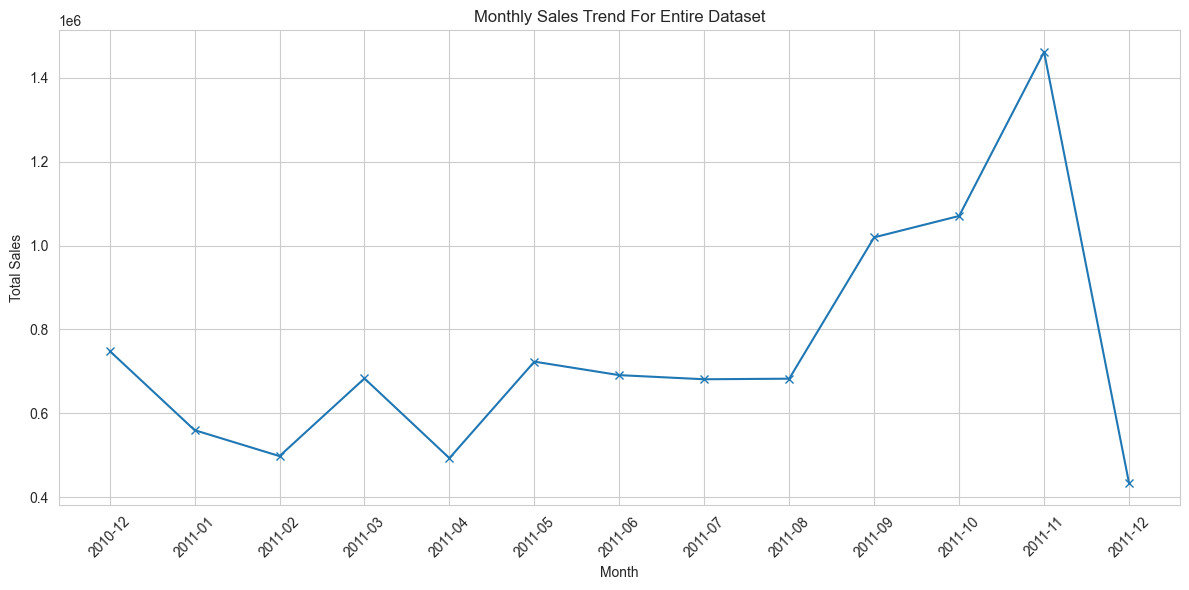

In [ ]:
clean_data['InvoiceDate'] = pd.to_datetime(clean_data['InvoiceDate']) #convert into datetime format

clean_data['Month'] = clean_data['InvoiceDate'].dt.to_period('M').astype(str) #converting the format to just year and month

monthly_sales = clean_data.groupby('Month')['Total_Transaction_Value'].sum().reset_index() #grouping month with total transaction value per month

plt.figure(figsize=(12, 6)) #size
plt.plot(monthly_sales['Month'], monthly_sales['Total_Transaction_Value'], marker='x') #plot line graph with the marker of x at each month point

plt.title('Monthly Sales Trend For Entire Dataset') #title
plt.xlabel('Month') #label
plt.ylabel('Total Sales') #label
plt.xticks(rotation=45) #rotate label
plt.tight_layout()
plt.show()

* Displaying top 8 Unique Customers - Quantity Purchased

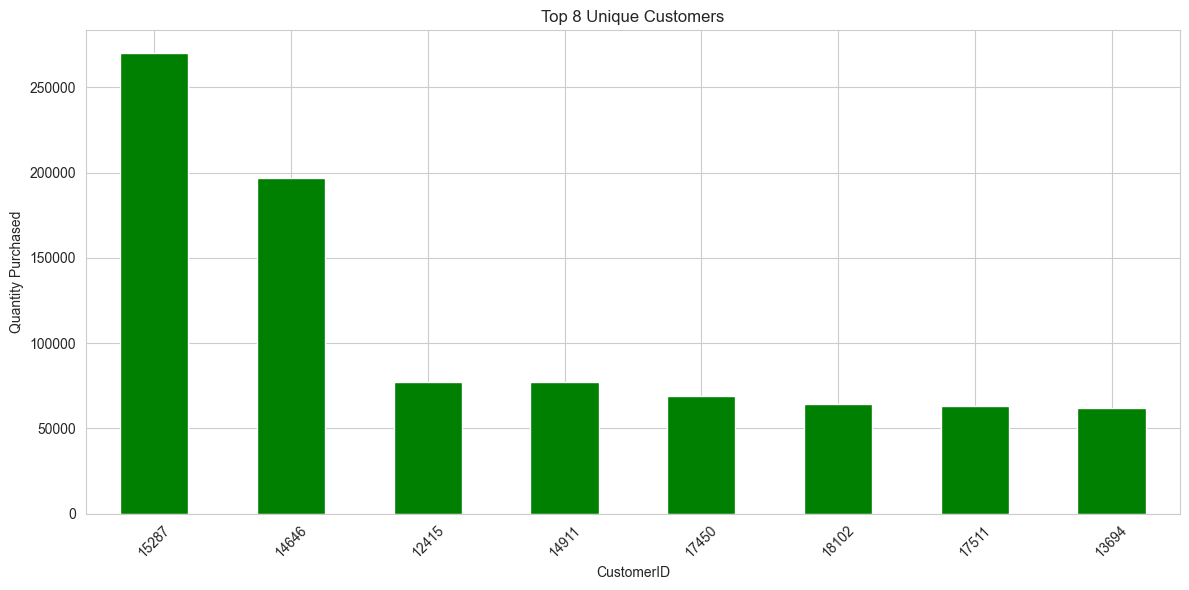

In [125]:
no_unique_customers = clean_data.groupby('CustomerID')['Quantity'].sum().sort_values(ascending=False).head(8) #group customer and quantity to get top 8

plt.figure(figsize=(12,6)) #size
no_unique_customers.plot(kind='bar', color='green') #horizontal bar plot with green bars
plt.title('Top 8 Unique Customers') # title
plt.xlabel('CustomerID') #label
plt.ylabel('Quantity Purchased') #label
plt.xticks(rotation=45) #rotate labels
plt.tight_layout()
plt.show()


* Displaying the top 8 most popular products

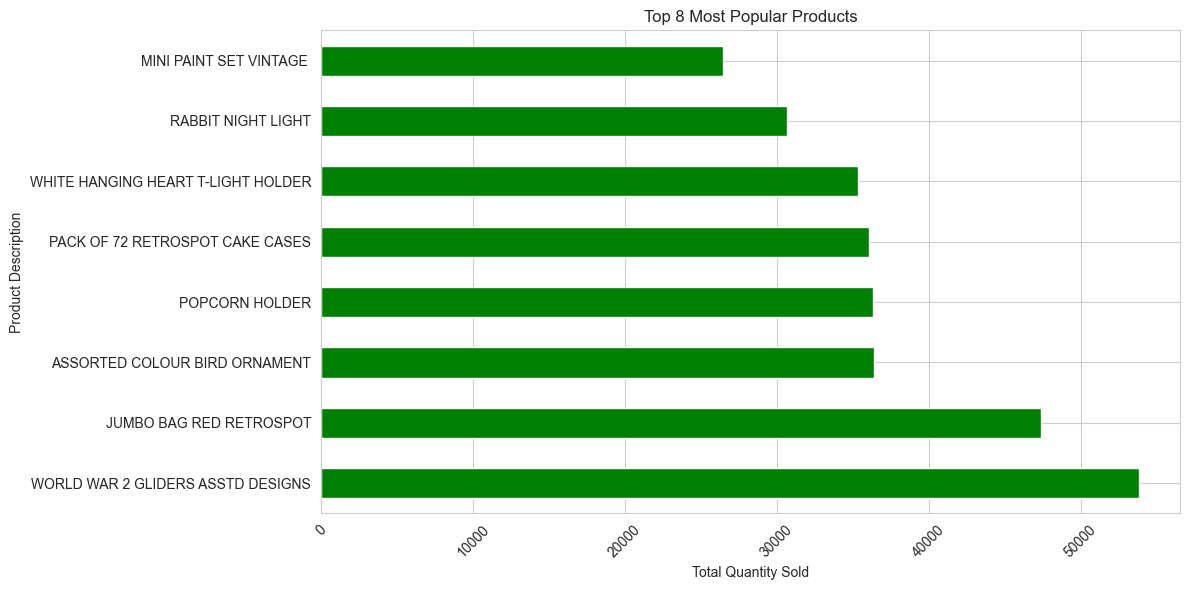

In [ ]:
popular_products = clean_data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(8) #group description and quantity to get top 8

plt.figure(figsize=(12,6)) #size
popular_products.plot(kind='barh', color='green') #horizontal bar plot with green bars
plt.title('Top 8 Most Popular Products') # title
plt.xlabel('Total Quantity Sold') #label
plt.ylabel('Product Description') #label
plt.xticks(rotation=45) #rotate labels
plt.tight_layout()
plt.show()


* Displaying The Top 5 Most Popular Products (UK Only)

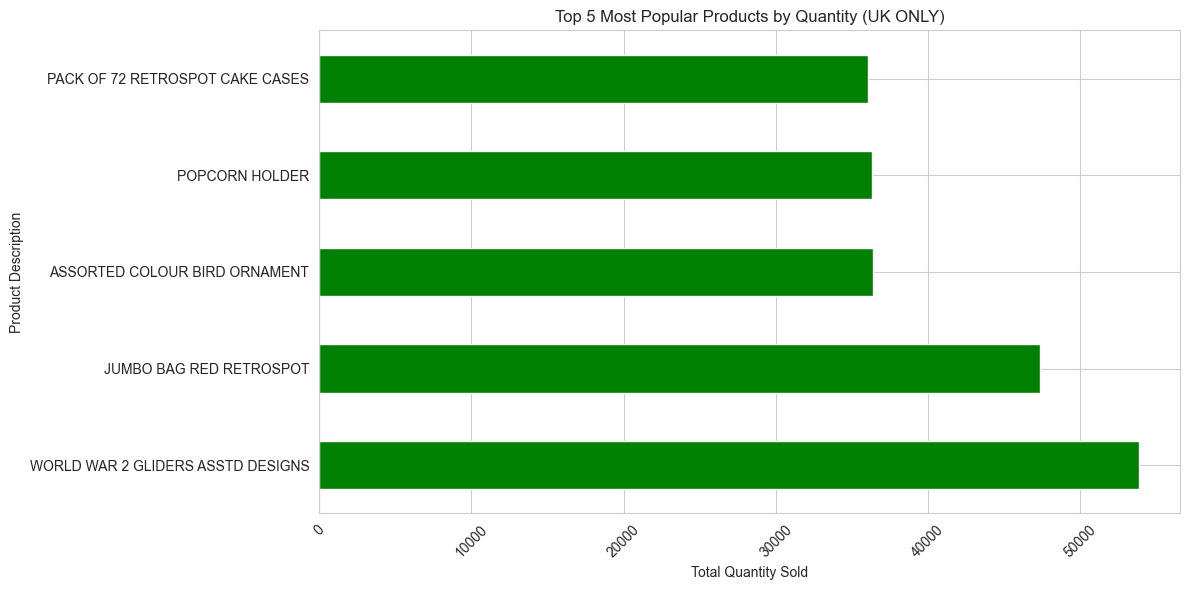

In [145]:
uk_only = clean_data[clean_data['Country'] != 'United Kingdom'] #filter UK only

popular_products = clean_data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(12,6))
popular_products.plot(kind='barh', color='green')
plt.title('Top 5 Most Popular Products by Quantity (UK ONLY)')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Displaying Top 4 Most Popular Countries - Distribution

Country
United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Name: count, dtype: int64


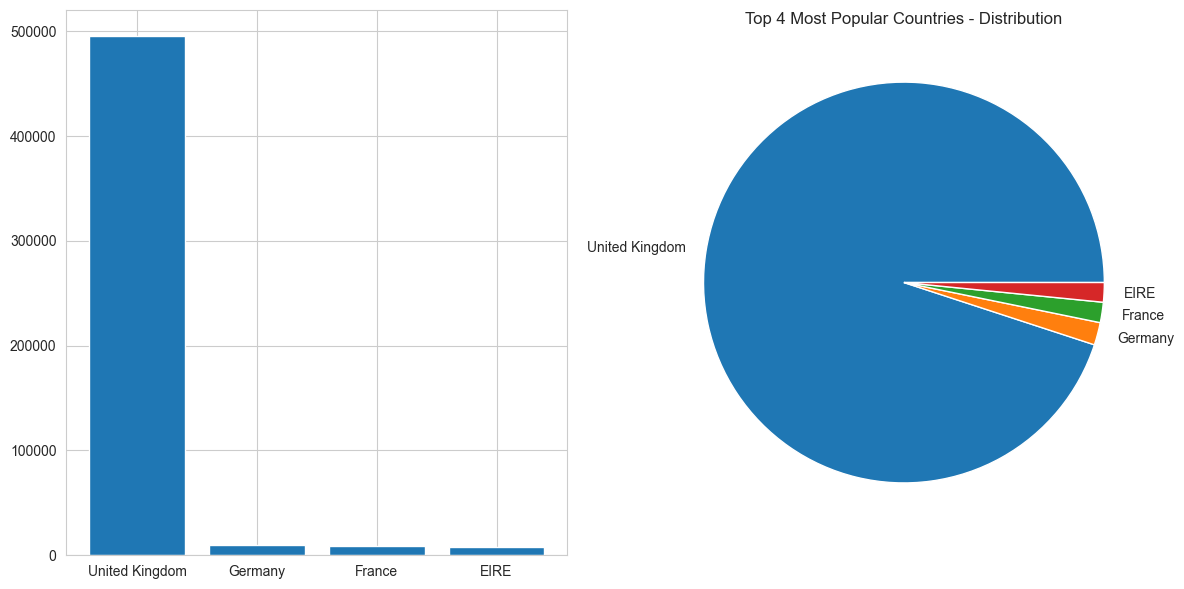

In [134]:
popular_country_count = clean_data['Country'].value_counts().head(4) #distribution count for top 4 countries
print(popular_country_count) #print statement

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6)) #set 1 row with 2 columns for charting

popular_country = df['Country'].value_counts().head(4) #top 4 countries 
axes[0].bar(x=popular_country.index, height=popular_country) #left chart to be a barchart


popular_country = df.value_counts('Country',normalize=True).head(4) #top 4 countries
axes[1].pie(x=popular_country, labels=popular_country.index) #right chart to be piechart

plt.title('Top 4 Most Popular Countries - Distribution') #title
plt.tight_layout()
plt.show()

---

# Section 2

Section 2 content

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
